# **Data augmentation et dropout**


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

## I) Data augmentation

Si vous avez suivi les TPs automatants, vous avez sûrement du remarquer que, pour entraîner un modèle d'IA, on a besoin de beaucoup de données. Or, on n'a parfois qu'un nombre limité de données à notre disposition donc il peut être nécessaire d'augmenter artificiellement celui ci, c'est la `data augmentation`. Le principe est d'appliquer des transformations à nos données pour en créer de nouvelles.

Dans ce TP, nous allons utiliser le dataset CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) constitué de 60 000 images. Dans ce TP, on présente deux transformations de base de pytorch : `RandomResizedCrop` récupère une partie aléatoire de l'image tout en conservant la taille initiale et `RandomHorizontalFlip` tourne l'image horizontalement. Libre à vous de tester d'autre transformations.

In [2]:
transform_base = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_crop = transforms.Compose(
    [transforms.RandomResizedCrop((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_flip = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=1), # p = 1 assure que toutes les images sont inversées, sinon on se retrouve avec des images inchangées
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

On va donc créer 3 datasets qui correspondent respectivement aux images de bases, ainsi que deux transformations définies dans la cellule précédente.

In [3]:
trainset_base = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = transform_base)

trainset_crop = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = transform_crop)

trainset_flip = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = transform_flip)

100%|██████████| 170498071/170498071 [00:12<00:00, 13701250.80it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


Pour le dataset de test, il n'est pas nécessaire d'appliquer de transformation

In [4]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform = transform_base)

Files already downloaded and verified


In [5]:
trainset = torch.utils.data.ConcatDataset([trainset_base, trainset_crop, trainset_flip])

In [6]:
BATCH_SIZE =  16

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False)

In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Affichons quelques images de notre dataset

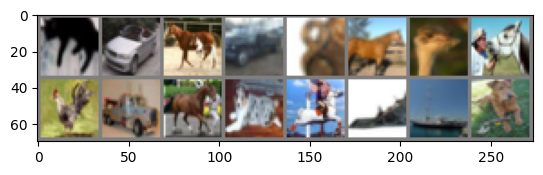

cat   car   horse truck cat   horse bird  horse bird  truck horse dog   horse plane ship  dog  


In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))


Il est maintenant temps de créer votre modèle, un CNN classique est suffisant dans notre cas.

In [50]:
# Ici, vous créez votre modèle

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)

        # Ajoutez des couches

    def forward(self, x):
        # Vous faites passer votre entrée à travers les couches que vous venez de créer

        return x


net = Net()

In [51]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [52]:
criterion = ...
optimizer = ...

On passe à l'entraînement du modèle, à chaque époque, on va faire à la fois l'entraînement et la validation, et en plus d'afficher la loss à chaque époque, on la garde en mémoire dans une liste, ce qui nous permettra de l'afficher sur un graphe à la fin de l'entraînement.

In [53]:
losses_train = []
losses_test = []
for epoch in range(...) :

    running_loss_train = 0.0
    running_loss_test = 0.0
    total_train = 0
    total_test = 0

    for i, data in enumerate(trainloader, 0):
        net.train()
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(...)
        loss_train = ...
        loss_train.backward()
        optimizer.step()

        running_loss_train += loss_train.item()
        total_train += labels.size(0)

    with torch.no_grad() :
        net.eval() # Cette ligne permet de mettre notre modèle en mode évaluation par 
        # opposition au mode entraînement, ce sera très utile pour la partie 2
        for i, data in enumerate(testloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = net(...)
            loss_test = ...

            running_loss_test += loss_test.item()
            total_test += labels.size(0)

    losses_test.append(running_loss_test/total_test)
    losses_train.append(running_loss_train/total_train)
    print(running_loss_train/total_train, running_loss_test/total_test)

print('Finished Training')

0.09296209779620171 0.07321363174319268
0.08022287330150604 0.06837788606584072
0.07479077412128449 0.06467990300655364
0.07147373146196206 0.06313037974834441
0.06936446137269338 0.061578859576582906
Finished Training


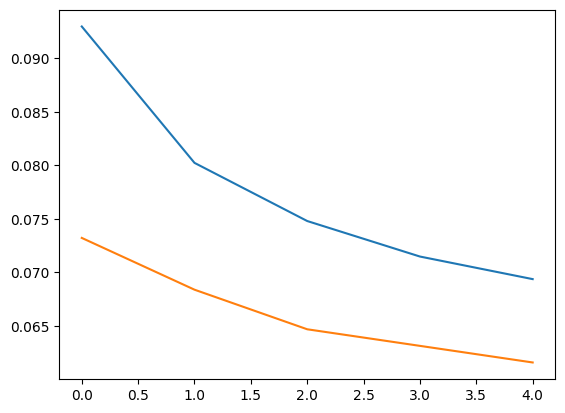

In [54]:
plt.plot(losses_train, label = "loss d'entraînement")
plt.plot(losses_test, label = "loss de test")
plt.show()

## II) Dropout

Dans cette seconde partie, on va se pencher sur le concept du dropout.

L’overfitting est un problème fréquent lors de l’entraînement d’un modèle de Deep Learning, mais une technique existe pour le contrer : le Dropout.

Le Dropout est une technique permettant de réduire l’overfitting lors de l’entraînement du modèle. Le terme `Dropout` fait référence à la suppression de neurones dans les couches d’un modèle de Deep Learning. En fait, on désactive temporairement certains neurones dans le réseau, ainsi que toutes ses connexions entrantes et sortantes.

![](schema_dropout.png)

Le choix des neurones à désactiver est aléatoire. On attribue une probabilité p à tous les neurones qui détermine leur activation. Lorsque p = 0.1, chaque neurone a une chance sur 10 d’être désactivé. À chaque epoch, on applique cette désactivation aléatoire. C’est-à-dire qu’à chaque passe (forward propagation) le modèle apprendra avec une configuration de neurones différentes, les neurones s’activant et se désactivant aléatoirement.

In [55]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)




        # On ajoute la couche de Dropout
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Vous faites passer votre entrée dans les couches que vous venez de créer
        # Pensez à faire passer x dans la couche dropout, après l'activation


        return x


net2 = Net2()

In [56]:
net2.to(device)

Net2(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [57]:
# Écrivez maintenant une boucle d'entraînement pour votre nouveau modèle avec dropout
# Pensez à passer le modèle en mode évaluation pendant la phase de test, cela assure que le 
# dropout est désactivé : on ne voudrait pas que notre modèle fasse de prédictions sans tous les neurones

0.06745795763174693 0.06100692734122276
0.06639770502656699 0.05884669418185949
0.06487408421436945 0.06102454486489296
0.06392651406188805 0.06145725304186344
0.06350757413744927 0.05768717260807753
Finished Training


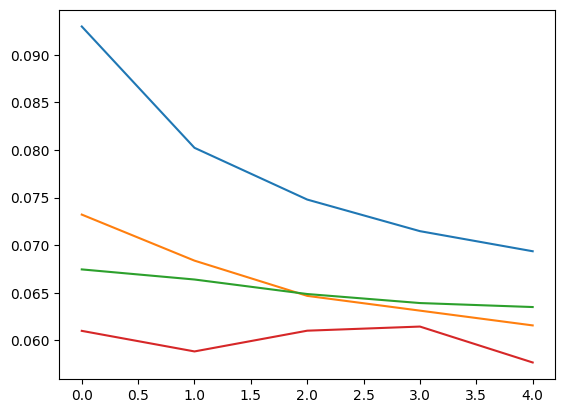

In [58]:
plt.plot(losses_train, label = "Entraînement sans dropout")
plt.plot(losses_test, label = "Test sans dropout")
plt.plot(losses_train_dropout, label = "Entraînement avec dropout")
plt.plot(losses_test_dropout, label = "Test avec dropout")
plt.show()